In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Выгружаем данные 

In [361]:
visit_data = pd.read_csv('visits_info_short.csv')
order_data = pd.read_csv('orders_info_short.csv')
costs_data = pd.read_csv('costs_info_short.csv')

In [362]:
visit_data.shape, order_data.shape,costs_data.shape

((309901, 6), (40212, 3), (1800, 3))

## Описание данных 

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.


Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.


Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

## Обзор данных 

In [363]:
visit_data['Session Start'] = pd.to_datetime(visit_data['Session Start'])
order_data['Event Dt'] = pd.to_datetime(order_data['Event Dt'])
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

In [364]:
def wonch_info(name_df):
    print(name_df.shape)
    print(name_df.head())
    print('_'*70)
    print(name_df.info())
    print('_'*70)
    print(name_df.describe())
    print('_'*70)

In [365]:
wonch_info(visit_data)

(309901, 6)
        User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device     

In [366]:
wonch_info(order_data)

(40212, 3)
        User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
______________________________________________________________________
            User Id                       Event Dt       Revenue
count  4.021200e+04                          40212  40212.000000
mean   4.990295e+11  2019-08-18 2

In [367]:
wonch_info(costs_data)

(1800, 3)
          dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None
______________________________________________________________________
                                  dt        costs
count                           1800  1800.000000
mean   2019-07-29 12:00:00.000000256    58.609611
min              2019-05-01 00:00:00     0.800000
25%              2019-06-14 18:00:00     6.495000
50%       

У нас есть полные данные о 5 месяцах рекламных компаний (с 2019-05-01 до 2019-10-31 23:56:56)

## Затраты на привлечение пользоваетелей для разных каналов, САС

In [368]:
def deferent_channel(costs):
    costs['month'] = costs['dt'].dt.to_period('M')
    result = costs.groupby(['Channel', 'month'])['costs'].sum().reset_index()

    return result

In [369]:
cost_channel_month = deferent_channel(costs_data)

In [370]:
costs_in_dynamic = (
    cost_channel_month.pivot_table(
        index = 'month', # даты первых посещений
        columns='Channel',
        values = 'costs', # траты на рекламу # сумма трат
    )
)

In [405]:
costs_in_dynamic

Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
2019-06,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2019-07,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
2019-08,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
2019-09,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
2019-10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


<Axes: xlabel='month'>

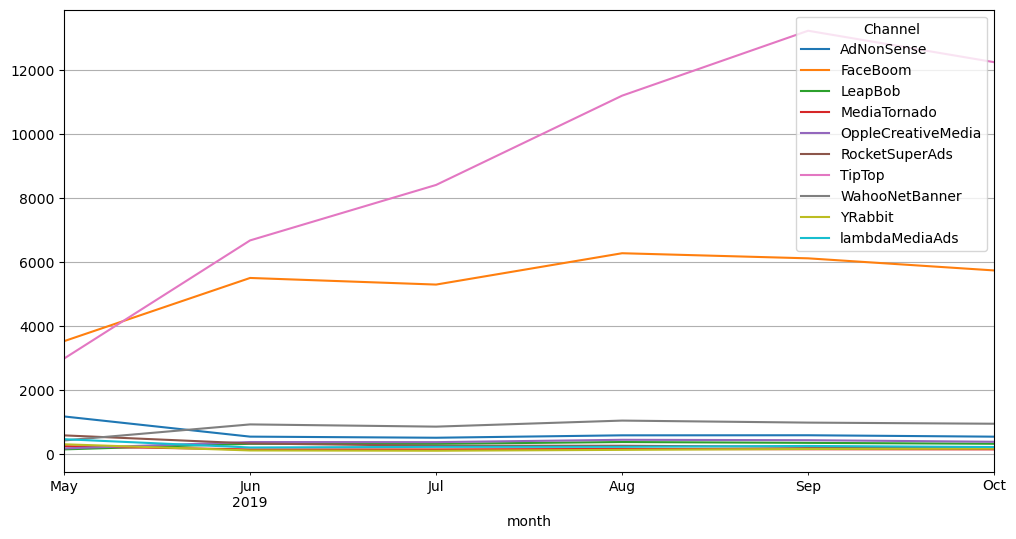

In [371]:
costs_in_dynamic.plot(figsize=(12, 6), grid=True)


In [372]:
cost_channel_month[(cost_channel_month['Channel'] == 'TipTop')], cost_channel_month[(cost_channel_month['Channel'] == 'FaceBoom')]

(   Channel    month    costs
 36  TipTop  2019-05   2981.0
 37  TipTop  2019-06   6675.6
 38  TipTop  2019-07   8410.2
 39  TipTop  2019-08  11202.0
 40  TipTop  2019-09  13232.5
 41  TipTop  2019-10  12250.0,
      Channel    month   costs
 6   FaceBoom  2019-05  3524.4
 7   FaceBoom  2019-06  5501.1
 8   FaceBoom  2019-07  5294.3
 9   FaceBoom  2019-08  6274.4
 10  FaceBoom  2019-09  6114.9
 11  FaceBoom  2019-10  5736.5)

Можно выделить основные каналы привлечения которые используюся чаще других. Это FaceBoom и TipTop.  
Видно, что за последние 5 месяцев затраты выросли:
* TipTop - на 9269
* FaceBoom - на 2212

Проверим насколько эффективны эти каналы привлечения, оправдвно ли увеличение затрат на FaceBoom, TipTop

### Первый источник перехода для каждого пользователя 

In [373]:
def first_visit(visit):
    first_session = visit.groupby('User Id')['Session Start'].min().reset_index()
    result = visit.merge(first_session, 
                        on=['User Id', 'Session Start'],
                        how='inner')
    return result

In [374]:
first_session = first_visit(visit_data)
first_session['month'] = first_session['Session Start'].dt.to_period('M')
first_session.head(3)

,User Id,Region,Device,Channel,Session Start,Session End,month
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019-05
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019-05
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019-05


In [375]:
start_in_dinamic = first_session.pivot_table(
    index='month',
    columns='Channel',
    values='User Id',
    aggfunc='count'
)
start_in_dinamic

Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05,1138,3187,695,1052,697,1052,2196,725,1066,608,14695
2019-06,532,4926,1486,632,1481,653,3213,1539,581,272,7808
2019-07,508,4754,1494,643,1457,604,3173,1401,603,304,7686
2019-08,582,5642,1757,689,1756,715,3720,1717,650,317,9041
2019-09,579,5487,1635,686,1707,722,3802,1625,714,346,9024
2019-10,541,5148,1486,662,1507,702,3457,1546,698,302,8185


**CAC**

In [412]:
cac_in_dynamic = costs_in_dynamic / start_in_dinamic
cac_in_dynamic = cac_in_dynamic.mean().sort_values(ascending=False).reset_index(name='mean_cac')
cac_in_dynamic['mean_cac'] = round(cac_in_dynamic['mean_cac'], 3)
cac_in_dynamic

,Channel,mean_cac
0,TipTop,2.687
1,FaceBoom,1.113
2,AdNonSense,1.004
3,lambdaMediaAds,0.721
4,WahooNetBanner,0.600
5,RocketSuperAds,0.403
6,OppleCreativeMedia,0.249
7,MediaTornado,0.218
8,YRabbit,0.211
9,LeapBob,0.209


<Axes: xlabel='month'>

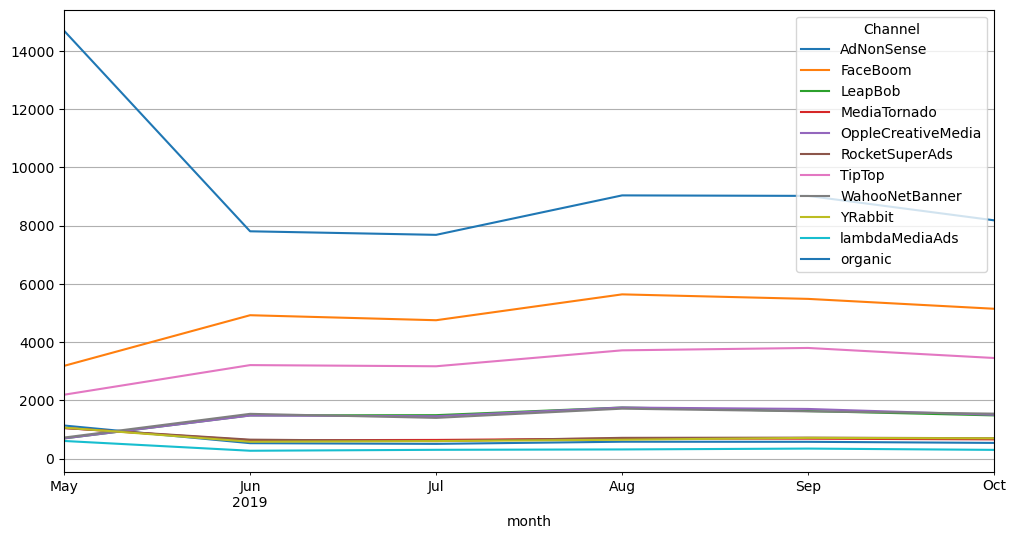

In [376]:
start_in_dinamic.plot(figsize=(12,6), grid=True)

Из прошлого графика мы выяснили, что затраты на маркетинг в TipTop и FaceBoom выросли. Однако это не увеличило количество пользователей, пришедших из этих канклов.  
Можно заметить, что большинстро пользователей продолжают приходить органическим путем 

In [377]:
first_session['Region'].value_counts()

Region
United States    100002
UK                17575
France            17450
Germany           14981
Name: count, dtype: int64

<Axes: ylabel='Channel'>

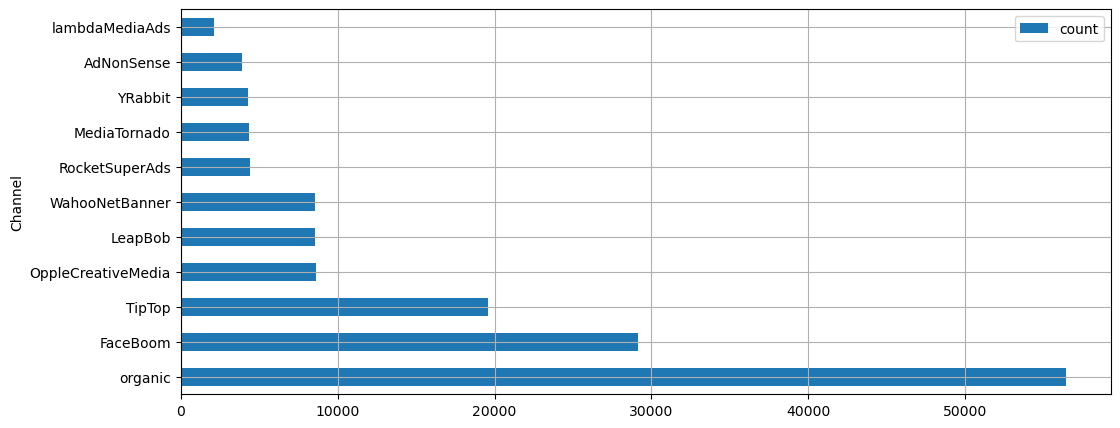

In [378]:
graf = start_in_dinamic.sum().reset_index(name='count').sort_values('count', ascending=False)
graf.plot(kind='barh', figsize=(12, 5), x='Channel', grid=True)

Среди не органических каналов привлечения больше людей приходят из FaceBoom и TipTop  
Именно в эти каналы маркетинг и вкладывает больше всего денег  
Нужно проверить окупается ли это влажение и посчитать метрики для каждого канала привлечения

## Метрики Retention, LTV, ROI

in process... 

### Retention 

retention  
посчиттать количество платящих пользователей в этом месяце, в следующием, найти соотношение

In [379]:
order_data.head(3)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99


нужно узнать зависимость retention от канала привлечения, поэтому добавляем в таблицу еще одну колонку с первым каналом привлечения 

In [380]:
order_data = order_data.merge(first_session[['User Id', 'Channel']],
                 on=['User Id'],
                 how='left')
order_data.head(3)

,User Id,Event Dt,Revenue,Channel
0,188246423999,2019-05-01 23:09:52,4.99,FaceBoom
1,174361394180,2019-05-01 12:24:04,4.99,RocketSuperAds
2,529610067795,2019-05-01 11:34:04,4.99,FaceBoom


In [381]:
def retention(channel, month):
    # считаем начало текущего и прошлого месяца
    current_month = pd.Timestamp(year=2019, month=month, day=1)

    if (month == 1):
        last_month = pd.Timestamp(year=2018, month=12, day=1)
    else:
        last_month = pd.Timestamp(year=2019, month=month-1, day=1)

    if (month == 12):
        new_month = pd.Timestamp(year=2020, month=1, day=1)
    else:
        new_month = pd.Timestamp(year=2019, month=month+1, day=1)

    # считаем количество платящих пользователей в прошлом месяце;
    users_last_m = order_data[(order_data['Event Dt'] >= last_month) & 
                              (order_data['Event Dt'] < current_month) & 
                              (order_data['Channel'] == channel)]
    
    last_m_count = len(users_last_m['User Id'].unique())

    # считаем количество платящих пользователей в текущием месяце;
    users_current_m = order_data[(order_data['Event Dt'] >= current_month) & 
                                 (order_data['Event Dt'] < new_month) & 
                                 (order_data['Channel'] == channel)]
    
    # находим кикие из платящих пользователей в этом месяце платили в прошлом 
    user_retention = users_last_m.merge(users_current_m,
                                        on=['User Id'],
                                        how='inner')
    current_m_count = len(user_retention['User Id'].unique())

    # считаем retention
    retent = current_m_count/last_m_count
    # print(f"Пользователей в прошлом месяце: {len(users_last_m['User Id'].unique())}")
    # print(f"Диапазон дат в данных: {order_data['Event Dt'].min()} - {order_data['Event Dt'].max()}")

    return round(retent*100, 3)

In [404]:
def count_order(channel, month):
    current_month = pd.Timestamp(year=2019, month=month, day=1)

    if (month == 12):
        new_month = pd.Timestamp(year=2020, month=1, day=1)
    else:
        new_month = pd.Timestamp(year=2019, month=month+1, day=1)

    # считаем какие покупки были совершены в запрашиваемом месяце и канале привлечения
    order_month = order_data[(order_data['Event Dt'] >= current_month) & 
                              (order_data['Event Dt'] < new_month) & 
                              (order_data['Channel'] == channel)]
    
    # считаем среднее количество пакупок на пользователя 
    order_month_count = order_month.groupby('User Id')['Revenue'].count().mean()

    return order_month_count

In [383]:
all_channel = order_data['Channel'].values
all_channel = np.unique(all_channel)
all_month = order_data['Event Dt'].dt.month.values
all_month = np.unique(all_month)
all_channel, all_month

(array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
        'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
        'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object),
 array([ 5,  6,  7,  8,  9, 10], dtype=int32))

находим для каждого месяца и каждого канала привлечения значение **retention, live time, ltv**

In [ ]:
# создаем таблицы со значением мерики 
# не берем первый известый месяц тк для него невозможно посчитать retention 
retent = pd.DataFrame(index=all_month[1:], columns=all_channel)
live_time = pd.DataFrame(index=all_month[1:], columns=all_channel)
count_orders = pd.DataFrame(index=all_month[1:], columns=all_channel)
ltv = pd.DataFrame(index=all_month[1:], columns=all_channel)

for i in range(len(all_channel)):
    for j in range(len(all_month) - 1):
            channel = all_channel[i]
            month = all_month[j+1]

            # ищем значения 
            retention_value = retention(channel, month) 
            outflow_value = 100 - retention_value
            live_time_value = 1/(outflow_value/100)
            count_order_value = count_order(channel, month)

            # заполняем таблицы
            retent.loc[month, channel] = retention_value
            live_time.loc[month, channel] = live_time_value
            count_orders.loc[month, channel] = count_order_value

            ltv.loc[month, channel] = live_time_value * count_order_value * 4.99

**Retention**

In [396]:
retent

,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
6,7.619,8.659,93.75,81.081,91.667,83.529,90.055,90.698,86.667,86.667,89.632
7,8.219,7.333,91.071,82.353,84.615,73.333,86.789,88.136,88.462,88.75,86.927
8,17.241,6.562,84.314,76.812,88.372,74.667,81.034,86.413,79.221,73.451,78.169
9,12.195,5.807,79.592,73.077,80.328,69.792,79.628,84.47,75.532,75.0,76.161
10,15.464,6.906,79.31,76.404,78.528,73.832,76.599,89.524,68.468,70.13,73.446


**Среднее Livetime по каналам**

In [417]:
live_time_channel = live_time.mean().reset_index(name='Live Time')
live_time_channel.sort_values(by='Live Time', ascending=False)

,index,Live Time
2,LeapBob,8.661573
7,WahooNetBanner,8.504798
4,OppleCreativeMedia,7.368169
6,TipTop,6.415873
10,organic,5.967155
8,YRabbit,5.647621
9,lambdaMediaAds,5.500707
3,MediaTornado,4.643451
5,RocketSuperAds,4.180099
0,AdNonSense,1.140433


**Среднее количество покупок по каналам**

In [415]:
count_orders.mean().sort_values(ascending=False).reset_index(name='mean_order')

,index,mean_order
0,WahooNetBanner,2.882256
1,LeapBob,2.596778
2,TipTop,2.548134
3,OppleCreativeMedia,2.534096
4,YRabbit,2.420215
5,MediaTornado,2.400071
6,organic,2.394737
7,lambdaMediaAds,2.302093
8,RocketSuperAds,2.146401
9,AdNonSense,1.340244


**LTV**

In [413]:
ltv.mean().sort_values(ascending=False).reset_index(name='mean_LTV')

,index,mean_LTV
0,WahooNetBanner,122.834471
1,LeapBob,114.652924
2,OppleCreativeMedia,95.006188
3,TipTop,83.871623
4,organic,74.19232
5,YRabbit,70.63685
6,lambdaMediaAds,64.134149
7,MediaTornado,55.769646
8,RocketSuperAds,45.445977
9,AdNonSense,7.62828


##  Визуализациия 

<Axes: >

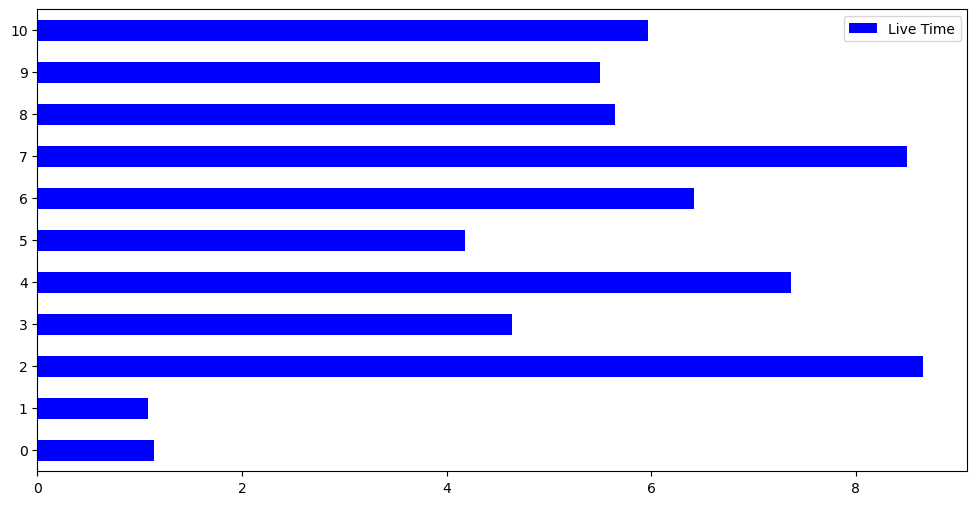

In [386]:
live_time_channel.plot(kind='barh', color='blue', figsize=(12,6))

<Axes: >

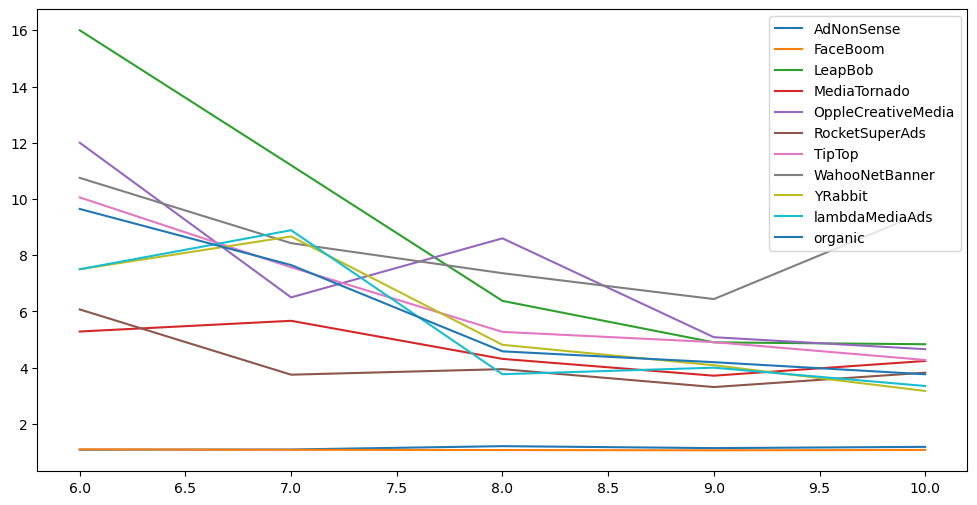

In [387]:
live_time.plot(figsize=(12,6))

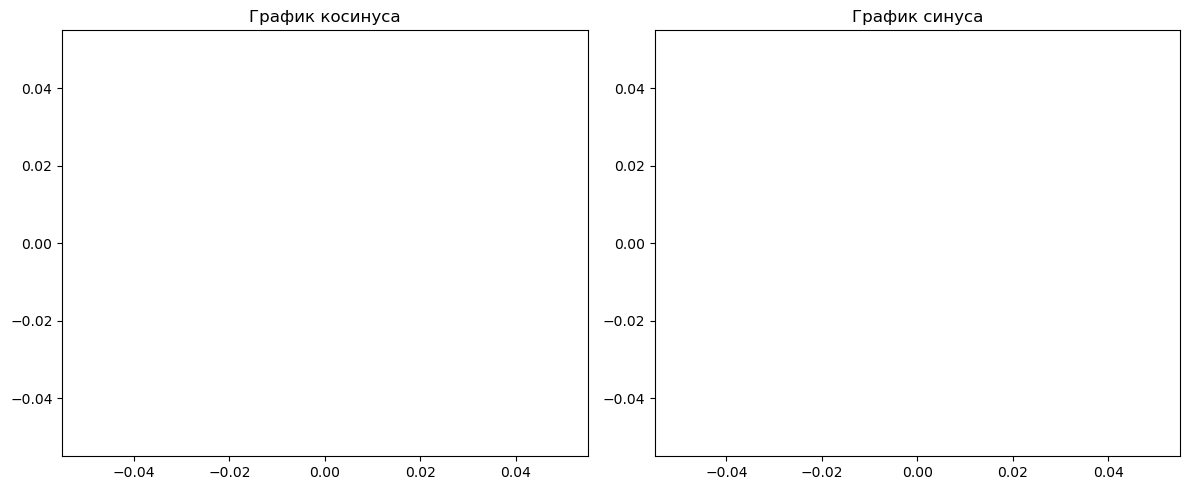

In [388]:
fig, (live_time, live_time_channel) = plt.subplots(1, 2, figsize=(12, 5))

# Первый график
live_time_channel.plot(kind='barh', color='blue')
live_time_channel.set_title('График синуса')


# Второй график
live_time.plot(color='red')
live_time.set_title('График косинуса')

# Автоматическое выравнивание
plt.tight_layout()


In [389]:
ltv

,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
6,507.745099,3911.540272,11896.16,3666.208573,8742.829713,8694.857629,70396.882856,19902.064072,5277.056926,7859.446486,58669.077932
7,440.385265,4415.595627,16039.086124,4439.451465,7232.824179,7073.236585,78904.776323,24647.167903,8995.666493,11355.022222,56148.473954
8,669.280682,4646.182495,13170.087977,3981.154045,13045.751634,7898.748668,67275.282084,27654.890704,5427.306415,5469.471543,33600.384774
9,727.430101,4879.120529,10293.953352,3966.348475,9385.420903,6491.889566,72748.38013,27632.968448,4629.434363,6087.8,33930.911532
10,761.462572,5145.766644,11624.842919,5265.765384,10899.357303,9324.785998,73140.891415,48823.501336,4003.773944,6281.352528,36550.237252


<Axes: >

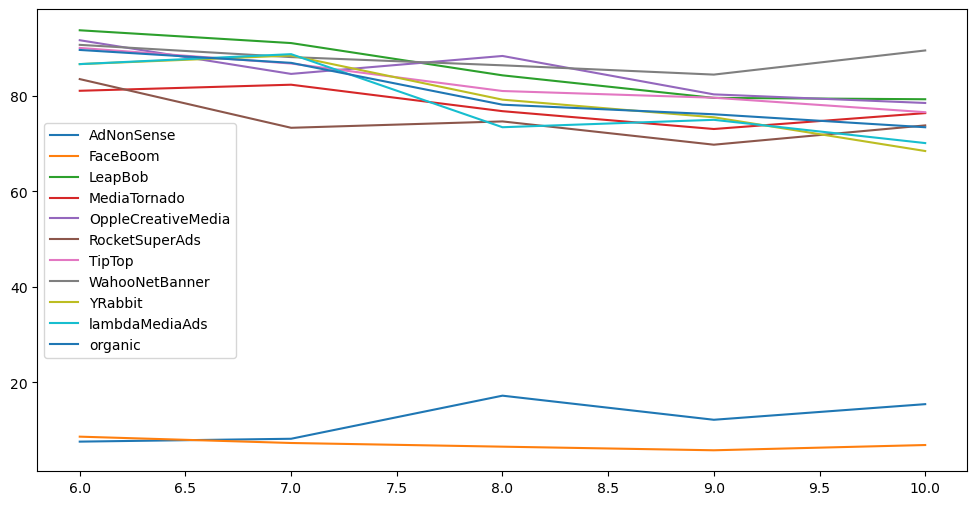

In [390]:
retent.plot(figsize=(12,6))

<Axes: >

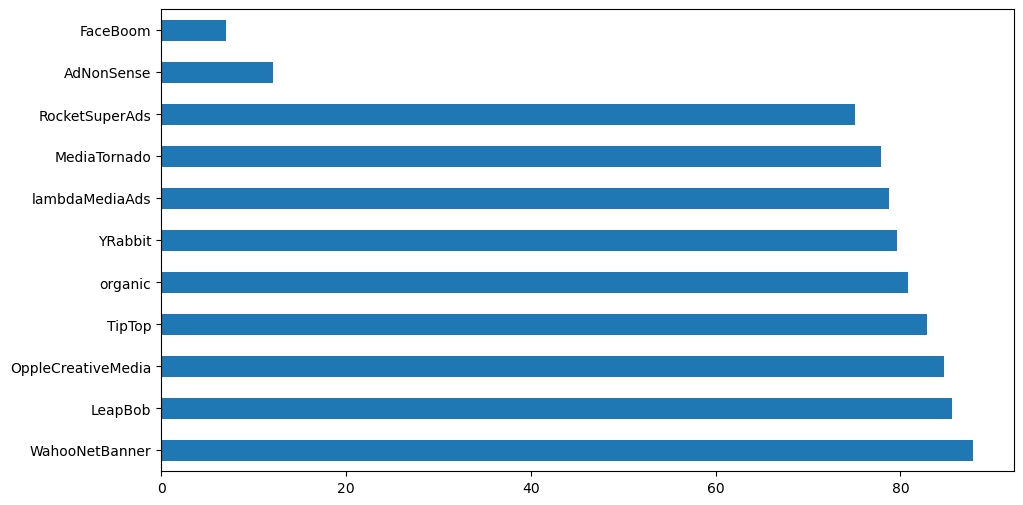

In [391]:
retent.mean().sort_values(ascending=False).plot(figsize=(11,6), kind='barh')

<Axes: >

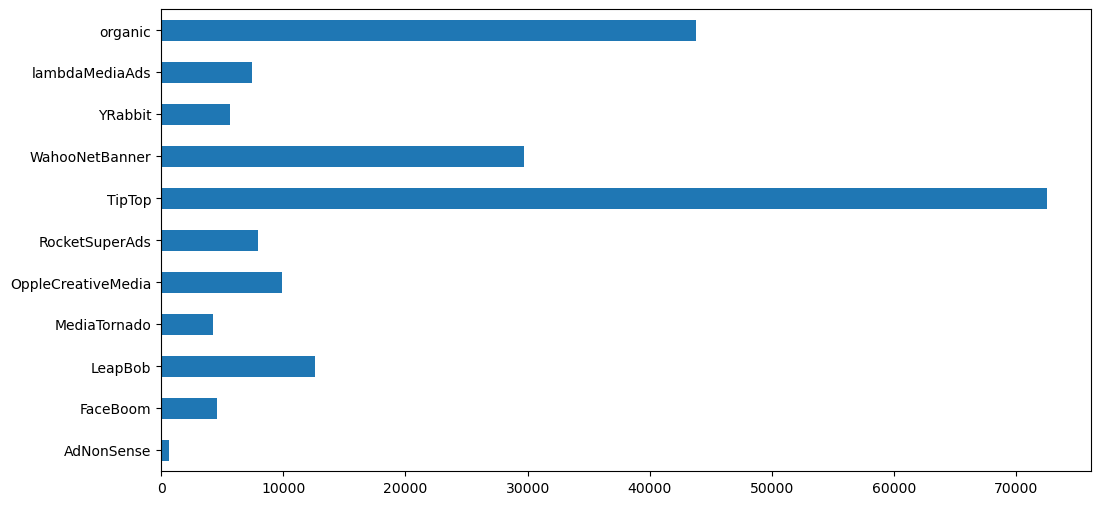

In [392]:
ltv.mean().plot(figsize=(12, 6), kind='barh')